In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("airbnb_eda.csv")
df

In [9]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,floor,noise(dB),Location
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,1,69.056465,"807, Friel Place, Brooklyn, Kings County, City..."
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,1,56.054278,"Bryant Park, 6th Avenue, Manhattan Community B..."
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,60.0,3,0,NaN,NaN,1,56.054278,"25, West 128th Street, Manhattan Community Boa..."
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,45.0,1,270,2019-07-05,4.64,1,69.056465,"188, Gates Avenue, Clinton Hill, Brooklyn, Kin..."
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,56.054278,"1626, Park Avenue, Manhattan Community Board 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39113,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,NaN,NaN,1,69.056465,"La Quinta, 1229, Atlantic Avenue, Brooklyn, Ki..."
39114,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,NaN,NaN,1,69.056465,"67, Evergreen Avenue, Brooklyn, Kings County, ..."
39115,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,46.0,10,0,NaN,NaN,1,56.054278,"434, Saint Nicholas Avenue, Harlem, Manhattan,..."
39116,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,NaN,NaN,1,56.054278,"Port Authority Bus Terminal, 625, 8th Avenue, ..."


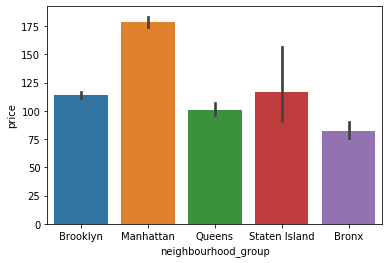

In [17]:
#Bar chart using seaborn
sns.barplot(x="neighbourhood_group", y="price", data=df)


In [21]:
df_Brook = df[df["neighbourhood_group"]=="Brooklyn"]
df_Man = df[df["neighbourhood_group"]=="Manhattan"]
df_Queens = df[df["neighbourhood_group"]=="Queens"]
df_SI = df[df["neighbourhood_group"]=="Staten Island"]
df_Bronx = df[df["neighbourhood_group"]=="Bronx"]


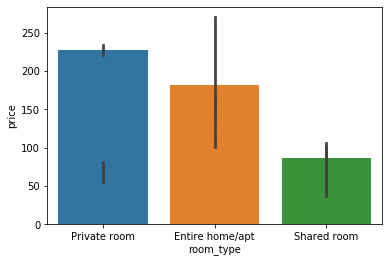

In [36]:
#fig,ax = plt.subplots(figsize = (12,10))

sns.barplot(x="room_type", y="price", data=df_Brook)#, ax=ax)

sns.barplot(x="room_type", y="price", data=df_Man)#, ax=ax)

sns.barplot(x="room_type", y="price", data=df_Queens)#, ax=ax)

sns.barplot(x="room_type", y="price", data=df_SI)#, ax=ax)

sns.barplot(x="room_type", y="price", data=df_Bronx)#, ax=ax)


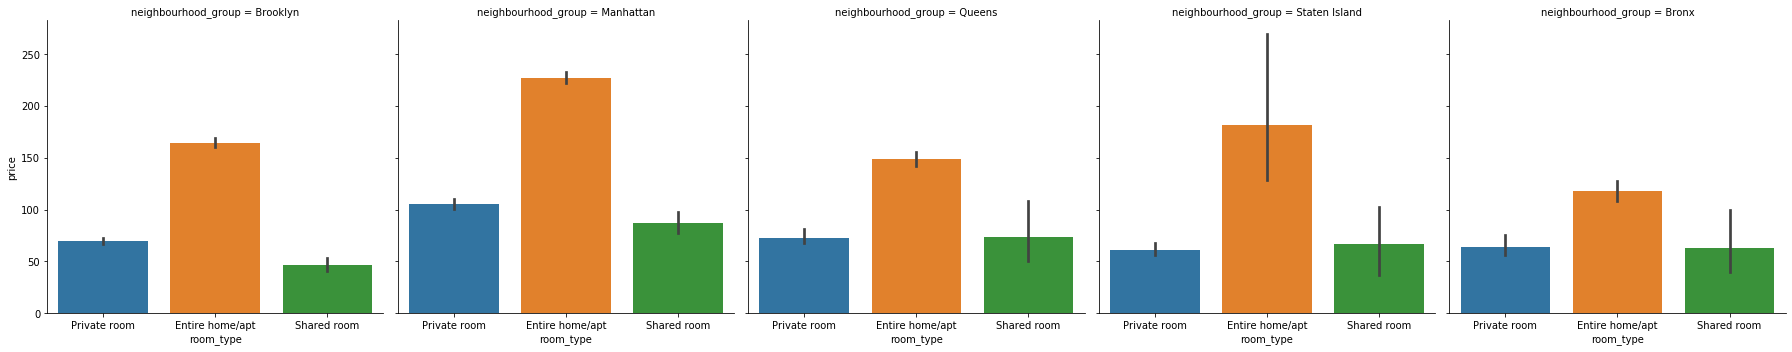

In [40]:
sns.catplot(x="room_type", y="price", kind = "bar", col="neighbourhood_group", data=df)


## Important graph 1 ^

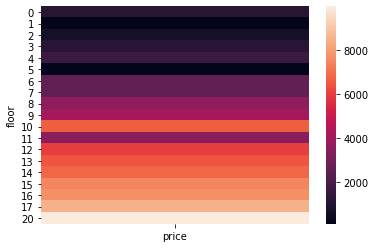

In [43]:
# Create a heatmap using seaborn
sns.heatmap(df.pivot_table(values="price", index="floor", aggfunc="mean"))


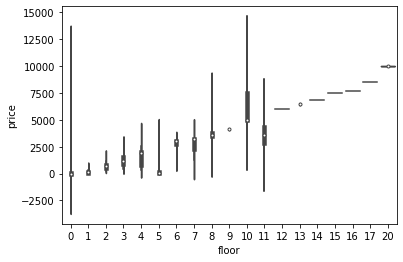

In [44]:
# Create a violin plot using seaborn
sns.violinplot(x="floor", y="price", data=df)

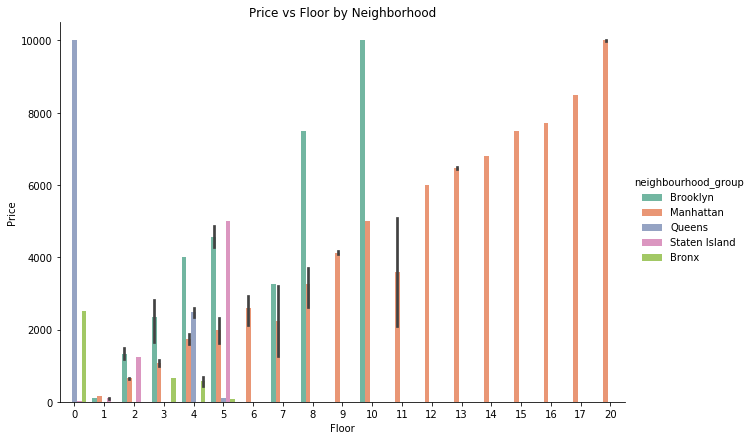

In [51]:
# Create a grouped barplot using seaborn
g = sns.catplot(x="floor", y="price", hue="neighbourhood_group", data=df, kind="bar", height=6, aspect=1.5, palette="Set2")

# Set the axis labels and title
g.set(xlabel="Floor", ylabel="Price", title="Price vs Floor by Neighborhood")


Text(0.5, 1, 'Price vs Floor by Neighbourhood Group')

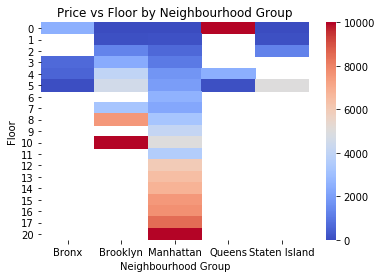

In [53]:
# Create a pivot table to calculate the mean price for each floor and neighbourhood_group
pivot = df.pivot_table(values="price", index="floor", columns="neighbourhood_group", aggfunc="mean")

# Create a heatmap using seaborn
sns.heatmap(pivot, cmap="coolwarm")

# Set the axis labels and title
plt.xlabel("Neighbourhood Group")
plt.ylabel("Floor")
plt.title("Price vs Floor by Neighbourhood Group")

## Important graph #2 ^

Text(0.5, 1.0, 'Scatterplot of Prices by Location')

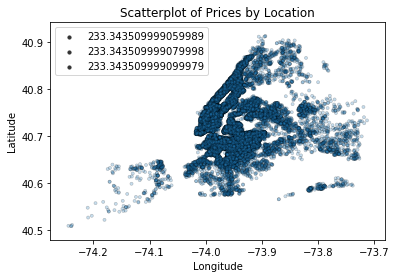

In [70]:
std_prices = np.std(df['price'])
sns.scatterplot(data=df, x='longitude', y='latitude', size=std_prices,
                sizes=(10, 30), alpha=0.25, edgecolor='black',
                linewidth=0.5)

# set axis labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatterplot of Prices by Location')

## Important graph #3

## Do listings in certain Brooklyn have higher average prices than Queens?

In [73]:
import statsmodels.api as sm

# Subset the data to two neighborhoods of interest
n_Bkl = df.loc[df['neighbourhood_group'] == 'Brooklyn']['price']
n_que = df.loc[df['neighbourhood_group'] == 'Queens']['price']

# Perform a z-test to compare the mean prices of the two neighborhoods
z_score, p_value = sm.stats.ztest(n_Bkl, n_que, alternative='larger')

# Print the results
print(f"Z-score: {z_score:.2f}")
print(f"P-value: {p_value:.4f}")

Z-score: 4.63
P-value: 0.0000


## Are shared rooms more expensive than private rooms on Airbnb in Bronx?

In [75]:
# Subset the data to two property types of interest

r_sha = df_Bronx.loc[df_Bronx['room_type'] == 'Shared room']['price']
r_prv = df_Bronx.loc[df_Bronx['room_type'] == 'Private room']['price']

# Perform a z-test to compare the mean prices of the two property types
z_score, p_value = sm.stats.ztest(r_sha, r_prv, alternative='larger')

# Print the results
print(f"Z-score: {z_score:.2f}")
print(f"P-value: {p_value:.4f}")

Z-score: -0.07
P-value: 0.5263


## Further investigation just because I was curious

In [77]:
# Subset the data to two property types of interest

r_sha = df_Queens.loc[df_Queens['room_type'] == 'Shared room']['price']
r_prv = df_Queens.loc[df_Queens['room_type'] == 'Private room']['price']

# Perform a z-test to compare the mean prices of the two property types
z_score, p_value = sm.stats.ztest(r_sha, r_prv, alternative='larger')

# Print the results
print(f"Z-score: {z_score:.2f}")
print(f"P-value: {p_value:.4f}")

Z-score: 0.08
P-value: 0.4680


In [78]:
# Subset the data to two property types of interest

r_sha = df.loc[df['room_type'] == 'Shared room']['price']
r_prv = df.loc[df['room_type'] == 'Private room']['price']

# Perform a z-test to compare the mean prices of the two property types
z_score, p_value = sm.stats.ztest(r_sha, r_prv, alternative='larger')

# Print the results
print(f"Z-score: {z_score:.2f}")
print(f"P-value: {p_value:.4f}")

Z-score: -2.49
P-value: 0.9937
